<a href="https://colab.research.google.com/github/NabilaAtiraQurratulAini/TKIA/blob/main/Modif_BM25_210411100066.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BM25**

Mengimport beberapa pustaka Python yang umum digunakan untuk pemrosesan dan analisis teks.

In [ ]:
# digunakan untuk manipulasi data.
import pandas as pd

# digunakan untuk pencarian dan manipulasi string dalam pola tertentu.
import re

# digunakan untuk pemrosesan bahasa alami di Python.
import nltk

# digunakan untuk membagi teks menjadi kalimat-kalimat.
from nltk.tokenize import sent_tokenize

# digunakan untuk membagi teks menjadi kata-kata.
from nltk.tokenize import word_tokenize

# digunakan untuk menganalisis kata-kata umum yang sering tidak membawa banyak makna.
from nltk.corpus import stopwords

# digunakan untuk mengubah kata-kata menjadi bentuk dasar atau akarnya.
from nltk.stem.porter import PorterStemmer

# digunakan untuk komputasi numerik di Python (melakukan operasi matematika pada array dan matriks).
import numpy as np

In [ ]:
# digunakan untuk melakukan tokenize  kalimat.
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# digunakan untuk menghapus kata-kata tersebut dari teks yang akan dianalisis.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# digunakan untuk membaca file csv menggunakan pustaka 'pandas' dan menyimpannya dalam sebuah dataframe 'df'.
df = pd.read_csv('https://raw.githubusercontent.com/NabilaAtiraQurratulAini/TKIA/main/tki1.csv')
df.head()

,member1,member2,member3,member4,member5,member6,member7
0,kim namjoon,kim seokjin,min yoongi,jung hoseok,park jimin,kim taehyung,jeon jungkook
1,yang jungwon,lee heeseung,park jongseong,shim jaeyun,park sunghoon,kim seonwoo,nishimura riki
2,lim jaebum,mark yieun tuan,jackson wang,park jinyoung,choi youngjae,kunpimook bhuwakul,kim yugyeom
3,mark lee,huang renjun,lee jeno,lee donghyuck,na jaemin,zhong chenle,park jisung


In [ ]:
# digunakan untuk mendefinisikan tujuh variabel dan memberikan bobot atau nilai kepada tujuh entitas.
member1_weight = 1
member2_weight = 2
member3_weight = 3
member4_weight = 4
member5_weight = 5
member6_weight = 6
member7_weight = 7

In [ ]:
# digunakan untuk membuat kolom baru yang berisi teks yang telah diubah menjadi huruf kecil dan dipecah menjadi kata-kata terpisah.
df['member1_lower'] = df['member1'].apply(lambda x : " ".join( x.lower() for x in x.split()))
df['member2_lower'] = df['member2'].apply(lambda x : " ".join( x.lower() for x in x.split()))
df['member3_lower'] = df['member3'].apply(lambda x : " ".join( x.lower() for x in x.split()))
df['member4_lower'] = df['member4'].apply(lambda x : " ".join( x.lower() for x in x.split()))
df['member5_lower'] = df['member5'].apply(lambda x : " ".join( x.lower() for x in x.split()))
df['member6_lower'] = df['member6'].apply(lambda x : " ".join( x.lower() for x in x.split()))
df['member7_lower'] = df['member7'].apply(lambda x : " ".join( x.lower() for x in x.split()))

In [ ]:
# digunakan untuk menghapus tanda baca dari setiap teks yang ada di setiap kolom.
df['member1_lower'] = df['member1_lower'].str.replace('[^\w\s\d]' ,' ')
df['member2_lower'] = df['member2_lower'].str.replace('[^\w\s\d]' ,' ')
df['member3_lower'] = df['member3_lower'].str.replace('[^\w\s\d]' ,' ')
df['member4_lower'] = df['member4_lower'].str.replace('[^\w\s\d]' ,' ')
df['member5_lower'] = df['member5_lower'].str.replace('[^\w\s\d]' ,' ')
df['member6_lower'] = df['member6_lower'].str.replace('[^\w\s\d]' ,' ')
df['member7_lower'] = df['member7_lower'].str.replace('[^\w\s\d]' ,' ')

<ipython-input-22-af92a8f9c261>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['member1_lower'] = df['member1_lower'].str.replace('[^\w\s\d]' ,' ')
<ipython-input-22-af92a8f9c261>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['member2_lower'] = df['member2_lower'].str.replace('[^\w\s\d]' ,' ')
<ipython-input-22-af92a8f9c261>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['member3_lower'] = df['member3_lower'].str.replace('[^\w\s\d]' ,' ')
<ipython-input-22-af92a8f9c261>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['member4_lower'] = df['member4_lower'].str.replace('[^\w\s\d]' ,' ')
<ipython-input-22-af92a8f9c261>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['member5_lower'] = df['member5_lower'].str.replace('[^

In [ ]:
# digunakan untuk membuat kolom baru yang berisi teks yang telah menjadi token (kata-kata terpisah).
df['member1_token'] = df['member1_lower'].apply(lambda x : word_tokenize(x))
df['member2_token'] = df['member2_lower'].apply(lambda x : word_tokenize(x))
df['member3_token'] = df['member3_lower'].apply(lambda x : word_tokenize(x))
df['member4_token'] = df['member4_lower'].apply(lambda x : word_tokenize(x))
df['member5_token'] = df['member5_lower'].apply(lambda x : word_tokenize(x))
df['member6_token'] = df['member6_lower'].apply(lambda x : word_tokenize(x))
df['member7_token'] = df['member7_lower'].apply(lambda x : word_tokenize(x))

In [ ]:
# digunakan untuk menghapus stop words (kata umum yang sering muncul dan tidak memberikan banyak infromasi).
stop = stopwords.words('english')
df['member1_token'] = df['member1_token'].apply(lambda x : list(i for i in x if i not in stop))
df['member2_token'] = df['member2_token'].apply(lambda x : list(i for i in x if i not in stop))
df['member3_token'] = df['member3_token'].apply(lambda x : list(i for i in x if i not in stop))
df['member4_token'] = df['member4_token'].apply(lambda x : list(i for i in x if i not in stop))
df['member5_token'] = df['member5_token'].apply(lambda x : list(i for i in x if i not in stop))
df['member6_token'] = df['member6_token'].apply(lambda x : list(i for i in x if i not in stop))
df['member7_token'] = df['member7_token'].apply(lambda x : list(i for i in x if i not in stop))

In [ ]:
# digunakan untuk melakukan stemming (penghapusan imbuhan) pada token-token yang ada di setiap kolom.
stemmer = PorterStemmer()
df['member1_token'] =  df['member1_token'].apply(lambda x : list(stemmer.stem(i)  for i in x))
df['member2_token'] =  df['member2_token'].apply(lambda x : list(stemmer.stem(i)  for i in x))
df['member3_token'] =  df['member3_token'].apply(lambda x : list(stemmer.stem(i)  for i in x))
df['member4_token'] =  df['member4_token'].apply(lambda x : list(stemmer.stem(i)  for i in x))
df['member5_token'] =  df['member5_token'].apply(lambda x : list(stemmer.stem(i)  for i in x))
df['member6_token'] =  df['member6_token'].apply(lambda x : list(stemmer.stem(i)  for i in x))
df['member7_token'] =  df['member7_token'].apply(lambda x : list(stemmer.stem(i)  for i in x))

In [ ]:
# digunakan untuk membuat kolom baru dalam dataframe 'df' yang merupakan hasil dari kombinasi token-token.
df['unstructured'] = df['member1_token']*member1_weight + df['member2_token']*member2_weight + df['member3_token']*member3_weight + df['member4_token']*member4_weight + df['member5_token']*member5_weight + df['member6_token']*member6_weight + df['member7_token']*member7_weight

# digunkaan untuk menghitung panjang total dari kolom 'unstructured', jumlah total artikel, dan rata-rata panjang 'unstructured' per artikel.
total_length = df['unstructured'].apply(len).sum(axis = 0)
total_articles = df.shape[0]
avg_len = total_length*1.0 / total_articles

In [ ]:
# digunakan untuk menginputkan sebuah query.
print('enter the query')
query = input()

# digunakan untuk melakukan beberapa operasi pemrosesan teks pada query yang diinputkan.
query = query.lower()
query = re.sub('[^\w\s\d]' ,' ' , query)
words = word_tokenize(query)
words = [i for i in words if i not in stop] 
words = [stemmer.stem(i) for i in words]

enter the query
park


In [ ]:
# digunakan untuk membuat kolom baru dalam dataframe 'df' dan menginisialisasi nilai semua barisnya.
df['relevance'] = 0

# digunakan untuk iterasi setiap kata dalam list.
for word in words:
        
        # digunakan untuk menghitung jumlah kemunculan kata dalam setiap baris dan menjumlahkannya.
        r = df['unstructured'].apply(lambda x:word in x).sum(axis = 0)

        # digunakan untuk menghitung idf dan mengukur sejauh mana kata tersebut umum atau langka dalam sebuah dokumen.
        idf = np.log((total_articles*1.0)/(r + 1) ) + 1  
        
        # digunakan untuk mendefinisikan sebuah fungsi yang menghitung relevansi kata dalam sebuah dokumen.
        def calc(doc):
            k = 1.2
            b =0.75
            tf = doc.count(word)
            weight = idf * ((k+1)*tf )/(k*(1 - b + b*(len(doc) / avg_len)) + tf)
            return weight  
            
        # digunakan untuk mengupdate kolom relevansi dataframe 'df' dengan menambahkan relevansi yang telah dihitung untuk setiap dokumen.
        df['relevance'] = df['relevance'] + df['unstructured'].apply(lambda x : calc(x))

In [ ]:
# digunakan untuk memilih kolom-kolom tertentu dari dataframe 'df'.
final_df = df.loc[: ,['member1', 'member2', 'member3', 'member4', 'member5', 'member6', 'member7', 'relevance']]

#digunakan untuk menyimpan dataframe 'df' ke dalam file csv baru.
final_df.to_csv('search_results1.csv')

In [ ]:
# digunakan untuk membaca file csv menggunakan pustaka 'pandas' dan menyimpannya dalam sebuah dataframe atau 'df'.
df = pd.read_csv('search_results1.csv')
df.head()

,Unnamed: 0,member1,member2,member3,member4,member5,member6,member7,relevance
0,0,kim namjoon,kim seokjin,min yoongi,jung hoseok,park jimin,kim taehyung,jeon jungkook,1.380067
1,1,yang jungwon,lee heeseung,park jongseong,shim jaeyun,park sunghoon,kim seonwoo,nishimura riki,1.487448
2,2,lim jaebum,mark yieun tuan,jackson wang,park jinyoung,choi youngjae,kunpimook bhuwakul,kim yugyeom,1.308667
3,3,mark lee,huang renjun,lee jeno,lee donghyuck,na jaemin,zhong chenle,park jisung,1.460393


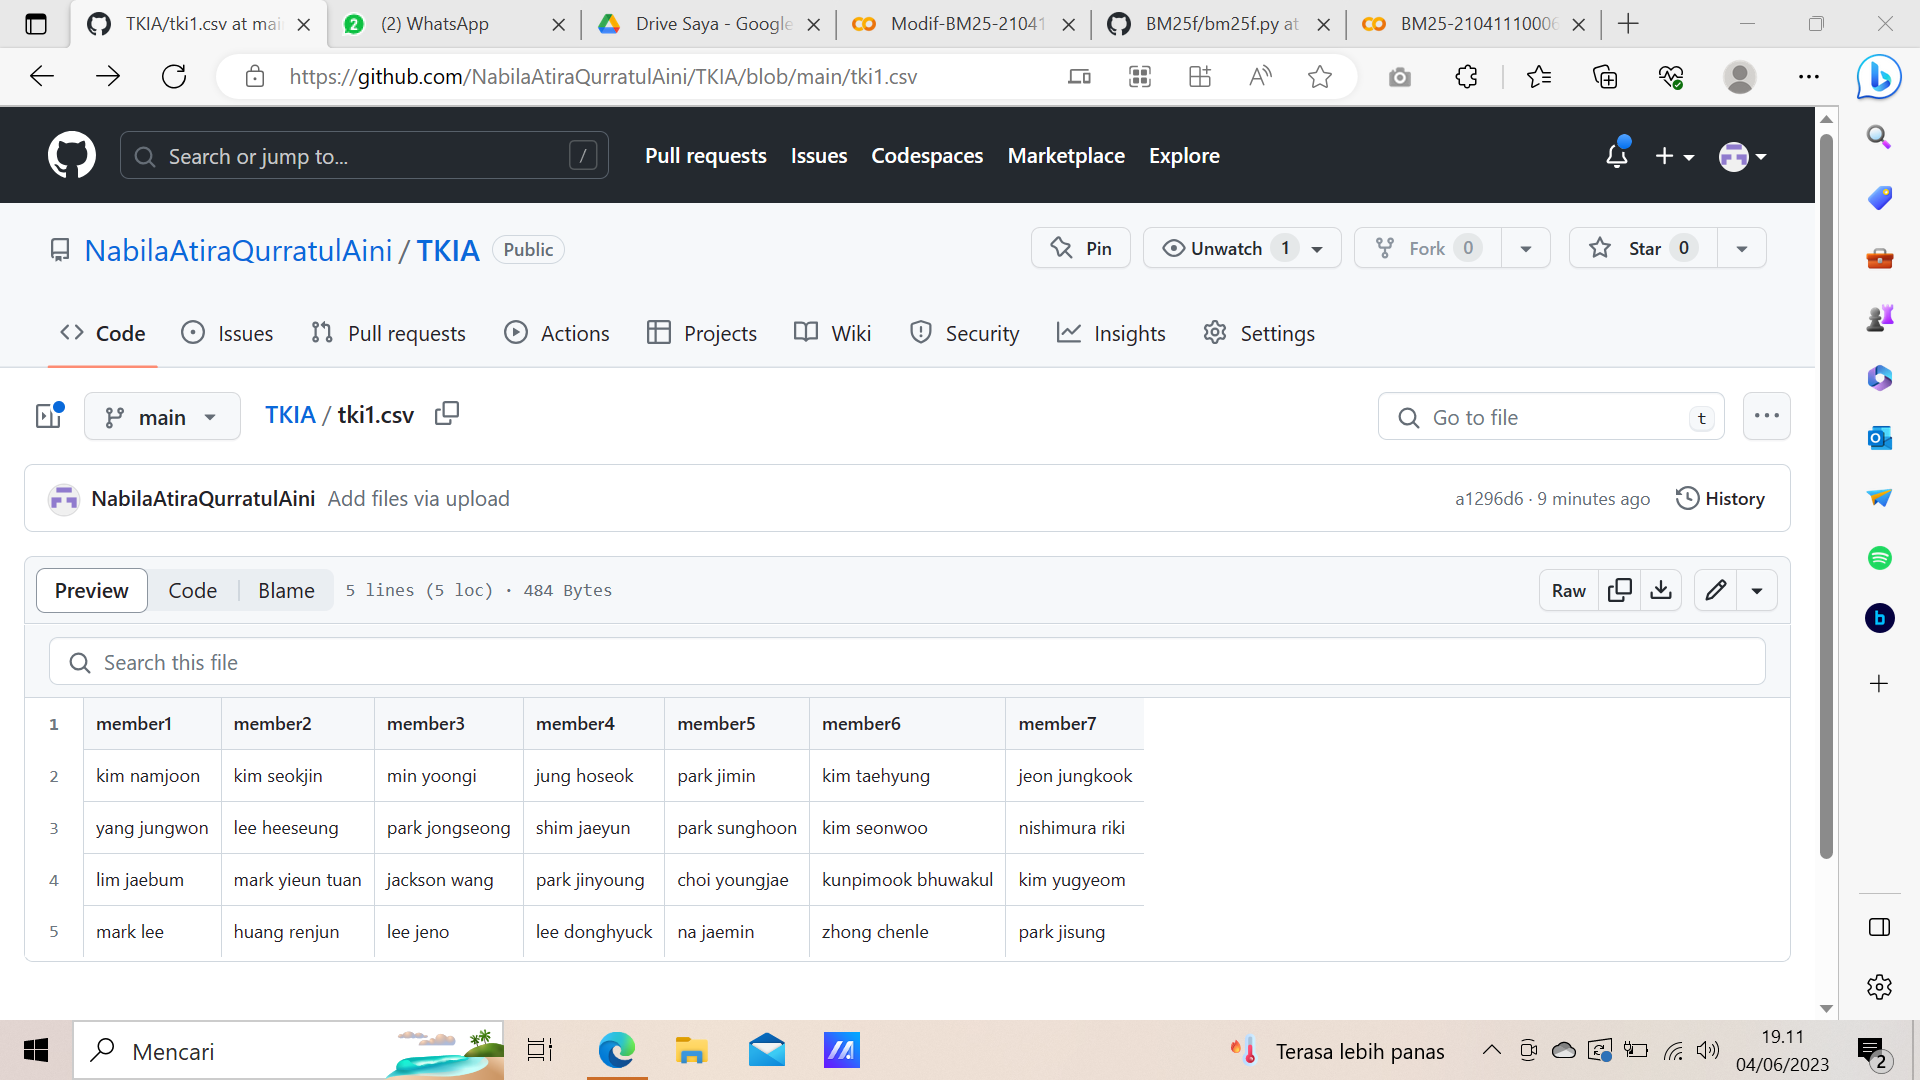